In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as st
import time

def Initialize_n_0_sim(mean, var, n = 5):
    random_sample = np.zeros((len(mean), n))
    for i in range(len(mean)):
        for j in range(n):
            random_sample[i][j] = np.random.normal(mean[i],  math.sqrt(var[i]))
    return random_sample

def initial_mean_and_var(random_sample):
    mean_initial, var_initial = np.zeros(len(random_sample)), np.zeros(len(random_sample))
    # Generate new mean and new variance according to the simulation outputs(i.e., random_sample)
    for i in range(len(random_sample)):
        mean_initial[i] = np.mean(random_sample[i])
        var_initial[i] = np.var(random_sample[i], ddof = 1)
    return mean_initial, var_initial

def allocation_sim(mean, var, n):
    random_sample = np.zeros(n)
    for j in range(n):
        random_sample[j] = np.random.normal(mean, math.sqrt(var))
    return random_sample

def b_and_s_b(Sample_mean, k):
    best_index = np.argmin(Sample_mean)
    if best_index == 0:
        second_index = 1
    else:
        second_index = 0
    for i in range(k):
        if Sample_mean[i] < Sample_mean[second_index] and i != best_index:
            second_index = i
        
    return best_index, second_index

def initial_ratio(k, mean, var):
    best_index = b_and_s_b(mean, k)[0]
    second_index = b_and_s_b(mean, k)[1]
    N = np.zeros(k)
    N[second_index] = 1
    
    for i in range(k):
        if i != best_index and i!= second_index:
            temp = (mean[best_index] - mean[second_index]) / (mean[best_index] - mean[i])
            N[i] = temp ** 2 * var[i] / var[second_index]
    sum_ = 0
    for j in range(k):
        if j != best_index:
            sum_ += (N[j]) ** 2 / var[j]
    N[best_index] = math.sqrt(var[best_index] * sum_)
    ratio_sum = N.sum()
    prop = np.zeros(k)
    for i in range(0, k):
        prop[i] = N[i] / ratio_sum
    return prop

def allocation(prob, tri_del, k):
    al_sim, I, D = np.zeros(k), np.zeros(k), np.zeros(k)
    for i in range(k):
        al_sim[i] = tri_del * prob[i] 
    # Find the integer part and decimal part of N
    for i in range(k):
        I[i] = math.modf(al_sim[i])[1]
        D[i] = math.modf(al_sim[i])[0]
    # Calculate the remaining computing budget 
    remain = tri_del - I.sum()
    # Return the sorted index of decimal part
    d = np.argsort(-D)
    i = 0
    # Allocata the remaining budget to the designs which have higher decimal parts
    while(remain):
        I[d[i]] += 1
        i += 1
        remain -= 1
    return I

def OCBA_method_PCS(k, mean, var, n_0 = 10, tri_del = 20, T = 5000):

    actual_best = np.argmin(mean)
    select_best = [ ]
    count_best = np.zeros(int((T - k * n_0) / tri_del))
    sample = Initialize_n_0_sim(mean, var, n_0)
    mean_init, var_init = initial_mean_and_var(sample)
    n_0_sims = np.full(k, n_0)
    addition_sims = np.zeros(k)
    sample_store = [[]] * k
    for i in range(k):
        sample_store[i] = []
        sample_store[i].extend(list(sample[i]))

    total_budget = k * n_0
  
    while(total_budget < T):
        if T - total_budget < tri_del:
            total_budget = T
        else:         
            total_budget += tri_del
            
        probs = initial_ratio(k, mean_init, var_init)
        allo = np.array(allocation(probs, total_budget, k), dtype = np.int)
        
        for i in range(k):
            addition_sims[i] = np.maximum(allo[i] - n_0_sims[i], 0)
        
        to_do = np.where(addition_sims > 0)
        for j in to_do[0]:
            new_sample = allocation_sim(mean[j], var[j], int(addition_sims[j]))
            sample_store[j].extend(list(new_sample))
            mean_init[j] = np.mean(sample_store[j])
            var_init[j] = np.var(sample_store[j], ddof = 1)
            n_0_sims[j] = allo[j]
#         print(n_0_sims)
#         print(mean_init)
        select_best.append(b_and_s_b(mean_init, k)[0])
    for i in range(int((T - k * n_0) / tri_del) ):
        if select_best[i] == actual_best:
            count_best[i] = 1
    return count_best

[ 53.  63.  65.  67.  70.  69.  72.  72.  73.  76.  76.  74.  75.  75.
  78.  79.  76.  79.  77.  79.  79.  79.  75.  75.  78.  78.  80.  83.
  85.  84.  84.  86.  88.  86.  88.  87.  90.  89.  89.  90.  89.  91.
  91.  89.  90.  92.  92.  93.  93.  94.  94.  93.  94.  92.  94.  94.
  95.  95.  95.  96.  96.  96.  96.  96.  96.  96.  96.  97.  97.  96.
  97.  97.  97.  96.  98.  98.  98.  98.  98.  99.  99.  99.  99.  98.
  99.  99.  99.  99.  99.  99.  99.  99.  99.  98.  99.  99.  99.  99.
  99.  99.  99.  99.  99.  99.  99.  99.  99.  99.  99.  99.  99.  99.
  99.  99.  99.  99.  99.  99.  99.  99.  99.  99.  99.  99.  99.  99.
  99.  99.  99.  99.  99.  99.  99.  99.  99.  99. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 

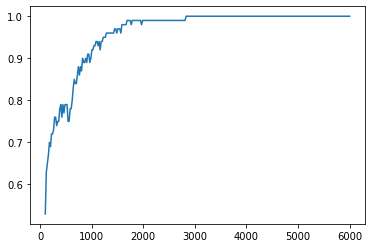

In [3]:
start = time.process_time()
n_0 = 10
k = 10
T = 6000
tri_del = 20
test_num = 100
mean = range(k)
var = np.ones(k) * 72
size_of_APCS = int((T - k * n_0) / tri_del)
tem, PCS = np.zeros(size_of_APCS), np.zeros(size_of_APCS)

for i in range(test_num):
    tem = OCBA_method_PCS(k, mean, var, n_0 , tri_del,T)
    PCS += tem
print(PCS)
PCS = PCS / test_num
x = np.linspace(k*n_0, T, len(PCS))
plt.plot(x, PCS)
a = np.where(PCS > 0.99)
T_ = k * n_0 + (a[0][0] - 1) * tri_del


end = time.process_time()
print('Runtime is %.3f seconds' %(end - start))
print('The computation cost for attaining P{CS} = 99% is ', T_)